In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'numpy'

In [ ]:
data_url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [ ]:
#Fetching the data from URL
titanic=pd.read_csv(data_url)
titanic.columns=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [ ]:
titanic.head()

In [ ]:
#Creating a new dataframe with required columns
data=titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

In [ ]:
data.head()

In [ ]:
#Getting dimentions of data frame
print(data.shape)

In [ ]:
#Getting details of basic stats from the dataframe
data.describe()

In [ ]:
#Converting sex columns to numeric by mapping male to 1 and female to 0
data.loc[:,'Sex']=data['Sex'].replace(['male','female'],[0,1])

In [ ]:
#Check for NULL values in the dataframe
data.info()

In [ ]:
table=pd.crosstab(data['Survived'],data['Sex'])
print(table)

In [ ]:
data.Age.isnull().sum()
print('No of Null Values in Age Column {} and percentage {}'.format(data.Age.isnull().sum(),round(data.Age.isnull().sum()/data.Age.count() * 100,2)))

In [ ]:
#Checking the class wise distribution for Survived Feature
sns.countplot(x='Survived',hue='Pclass',data=data)

In [ ]:
sns.boxplot('Age',data=data)

In [ ]:
#Getting Mean age of By Sex
age_list=data.groupby('Sex')['Age'].mean().to_list()
male_age=age_list[0]
female_age=age_list[1]
print('Mean age of Male is {} and Female is {}'.format(round(male_age,2),round(female_age,2)))

In [ ]:
data.loc[(data['Sex']==0) & (data['Age'].isna()),'Age']=round(female_age)
data.loc[(data['Sex']==1) & (data['Age'].isna()),'Age']=round(male_age)
print(data.isna().sum())

In [ ]:
X=data.drop('Survived',axis=1)
Y=data['Survived']

In [ ]:
X

In [ ]:
Y

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20, random_state= 355)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

#### No need for PCA in this case as no major imapct by reducing no of columns

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']   
}

ModuleNotFoundError: No module named 'sklearn'

In [26]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [27]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [28]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 3, 'min_samples_split': 9, 'splitter': 'random'}


In [29]:
grid_search.best_score_

0.8272037821333595

In [30]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =13, min_samples_leaf= 6, min_samples_split= 4, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=6,
                       min_samples_split=4)

In [31]:
clf.score(x_test,y_test)

0.7988826815642458

In [32]:
y_pred=clf.predict(x_test)

In [33]:
print(list(y_test))

[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]


In [34]:
print(list(y_pred))

[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [35]:
confusion_matrix(y_test, y_pred)

array([[98, 21],
       [15, 45]], dtype=int64)

In [36]:
tn,fp,fn,tp=confusion_matrix(y_test, y_pred).ravel()
print('True Negative: ',tn)
print('False Positive: ',fp)
print('False Negative: ',fn)
print('True Positive: ',tp)

True Negative:  98
False Positive:  21
False Negative:  15
True Positive:  45


In [37]:
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

Accuracy Score:  0.7988826815642458


In [38]:
#Working on getting Precision and Recall Value
precision=tp/(tp+fp)
print('Precision: ', round(precision,2))

Precision:  0.68


In [39]:
recall=tp/tp+fn
print('Recall Value:', round(recall,2))

Recall Value: 16.0


In [40]:
f1_score=2*precision*recall/(precision + recall)
print('F1 Score: ',f1_score)

F1 Score:  1.307901907356948


In [41]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print(score)

0.7142857142857143


In [42]:
import pydotplus
from IPython.display import Image

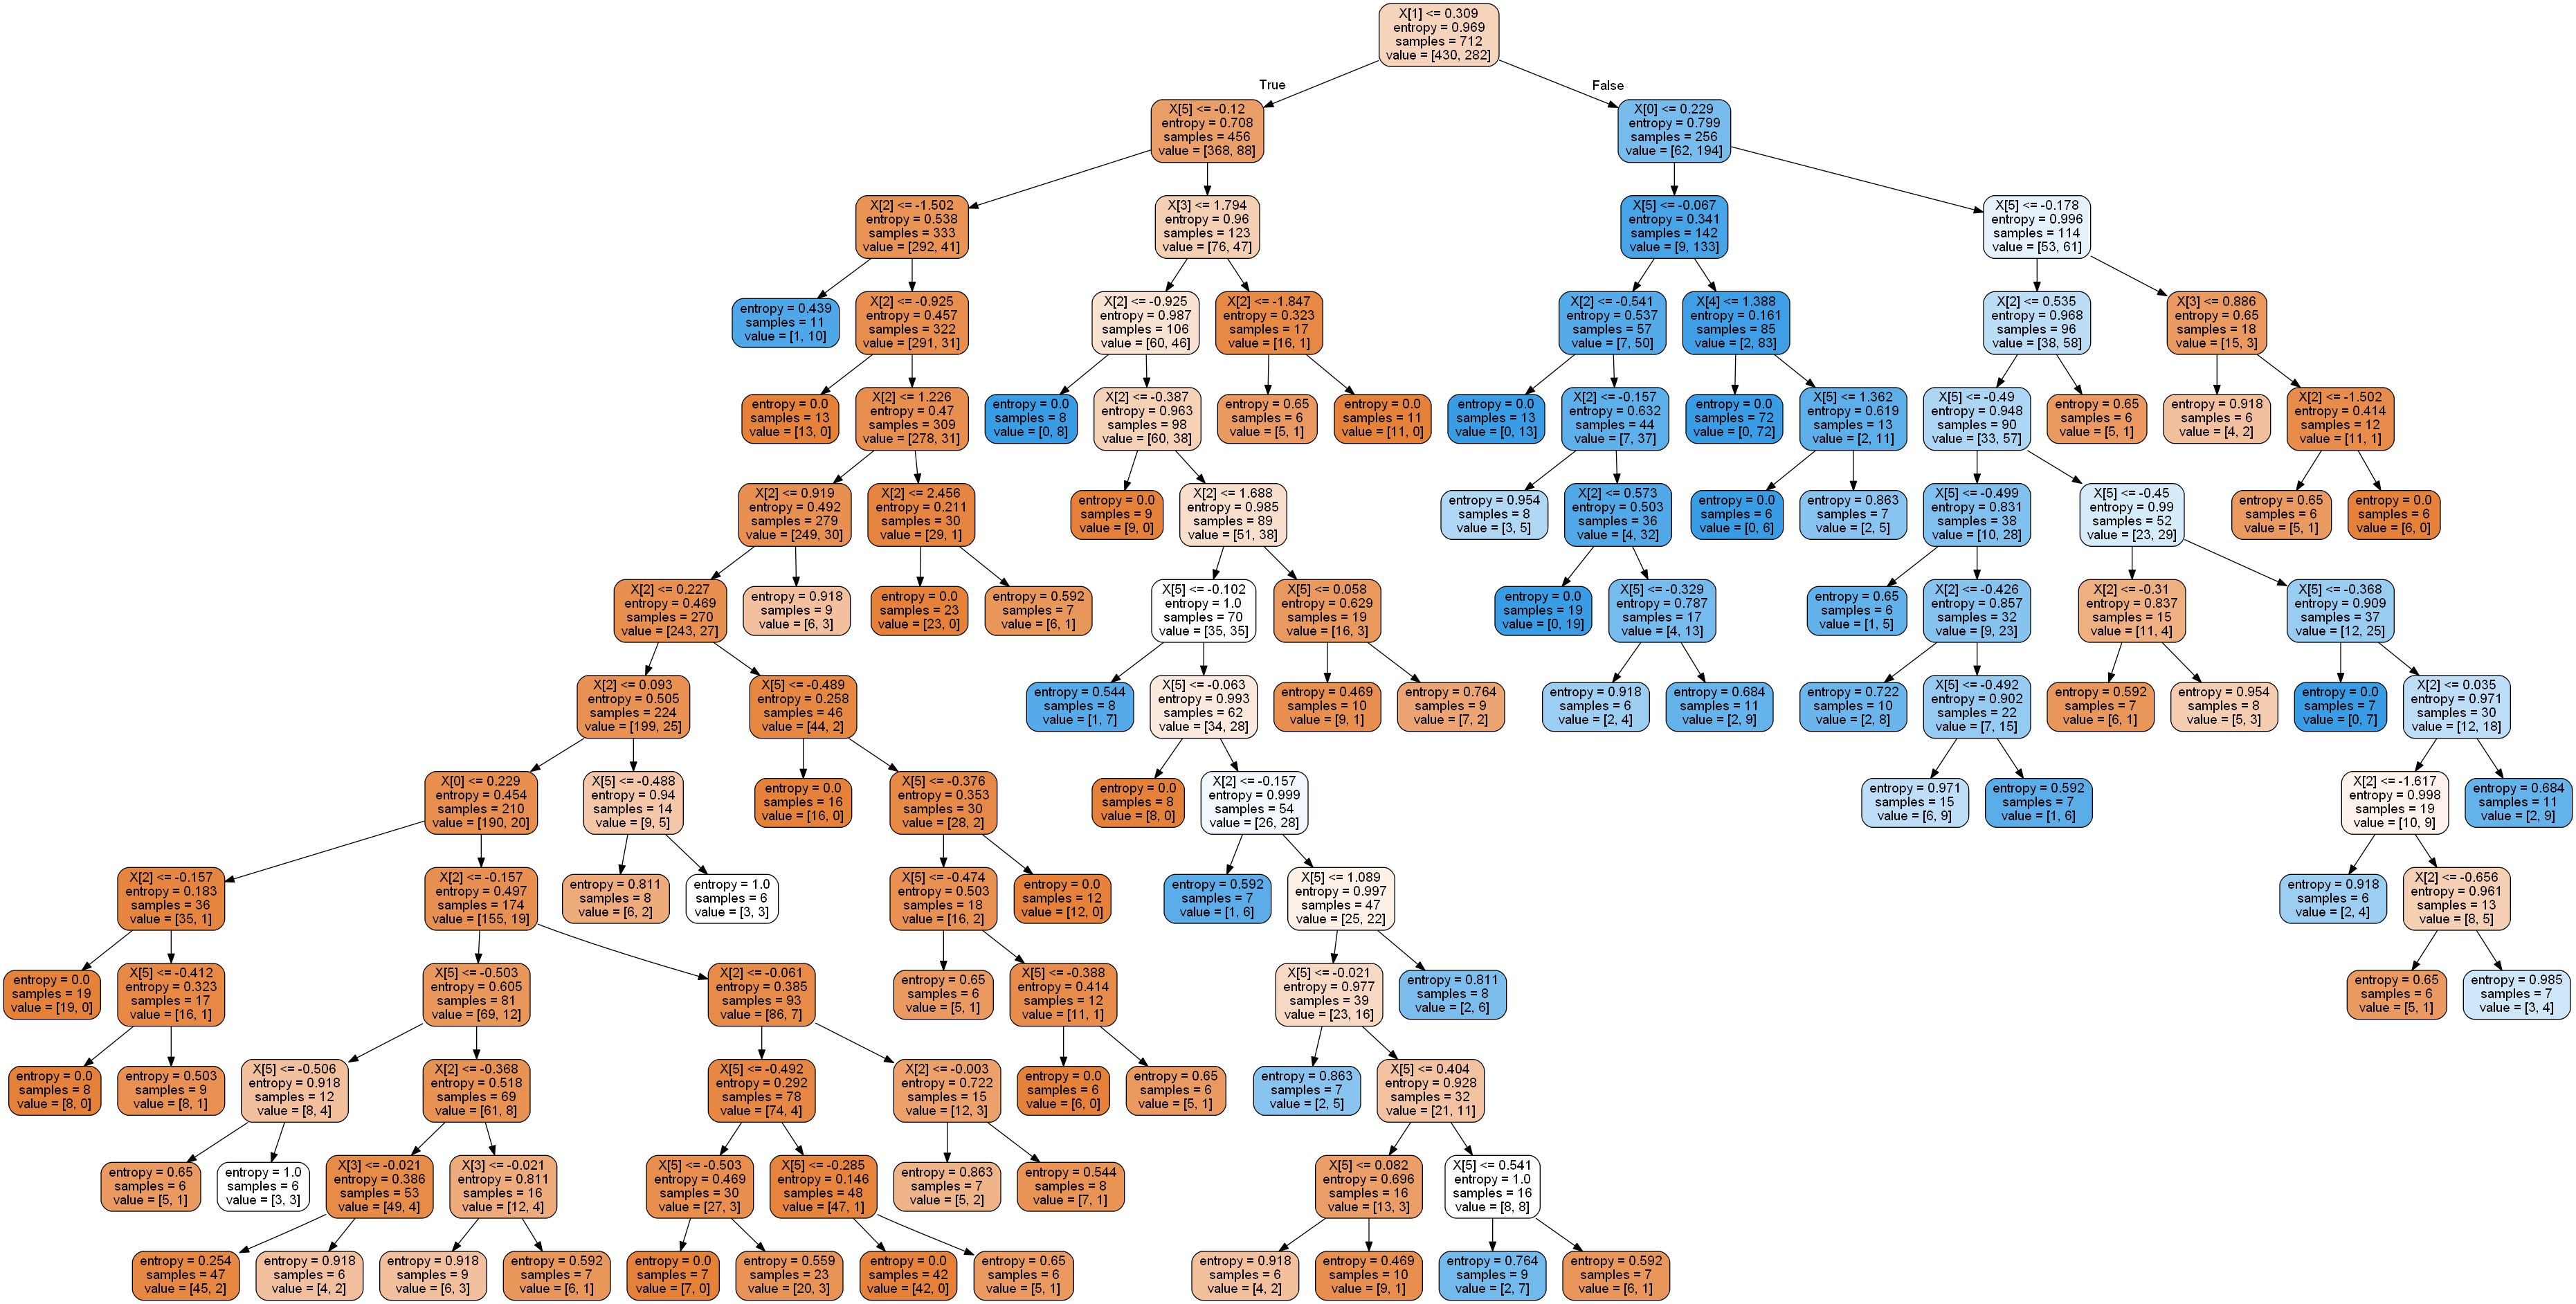

In [43]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("titanic_tree.png")
# Show graph
Image(graph.create_png())

In [44]:
clf.feature_importances_

array([0.10683133, 0.38917158, 0.23362812, 0.03038756, 0.01345519,
       0.22652622])

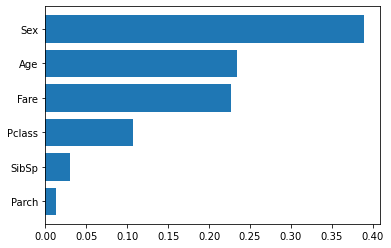

In [45]:
#Checking the importance of each feature and 
pd.Series(clf.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)